In [81]:
import numpy as np
import matplotlib.pyplot as plt
data_z = np.loadtxt('./rydberg_data/11_14/z_L1_12_den0.000_delta-10.0_5.0_omega1.200_ramptime6.000_dt0.051_No0.csv', delimiter = ',')
data_zz = np.loadtxt('./rydberg_data/11_14/zz_L1_12_den0.000_delta-10.0_5.0_omega1.200_ramptime6.000_dt0.051_No0.csv', delimiter = ',')

In [114]:
def detuning(t):
    if t < 6:
        return -10+15*t/6
    else:
        return 5

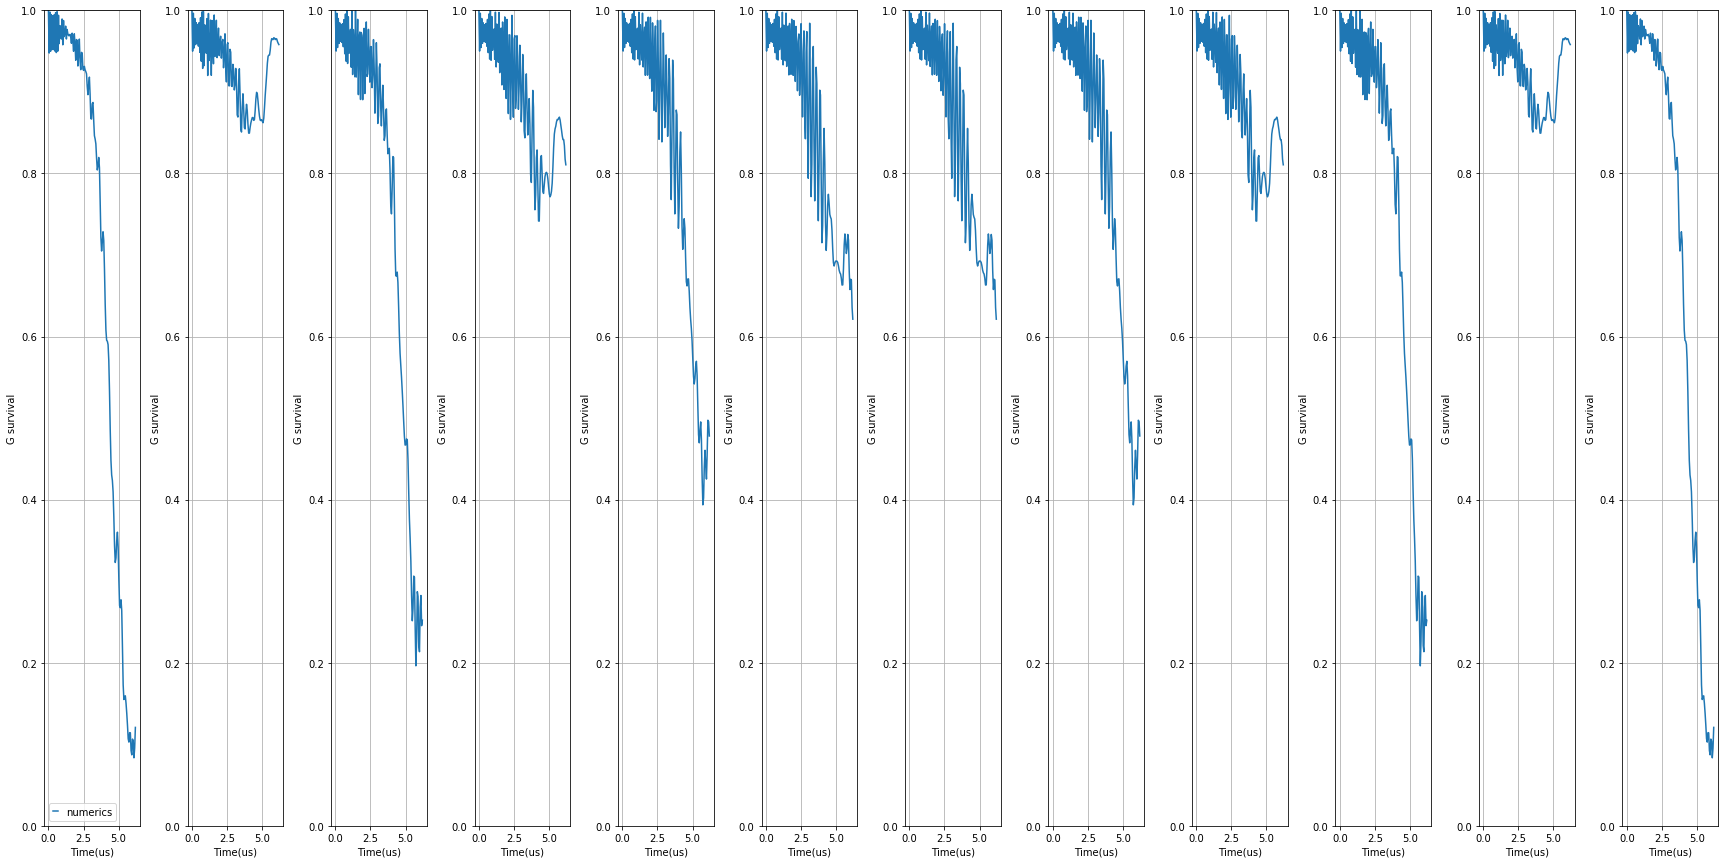

In [82]:
fig,ax = plt.subplots(ncols=12,nrows=1,figsize=(30,15))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
dt = 0.0512
for i in range(12):
    ax[i].plot(np.arange(len(data_z[:,i]))*dt,1-(data_z[:,i]+1)/2,ls='-',label='numerics')
    ax[i].set_ylim([0,1])
    ax[i].set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax[i].grid()

    ax[i].set_xlabel('Time(us)')
    ax[i].set_ylabel('G survival')
ax[0].legend(handlelength=0.5)
plt.show()


In [120]:
detuning = np.piecewise(t, [t < 6, t >= 6], [lambda t :-10+15*t/6, 5])

In [88]:
site = len(data_z[1])
tstep = len(data_z)
data_zz_n = data_zz.reshape((tstep,site,site))
t = np.arange(len(data_z[:,1]))*dt 
g = np.zeros((tstep,site))

In [89]:
for j in range(tstep):
    for i in range(site): # starting from 0th site, with i gap
            g[j,i] = data_zz_n[j,0,i]-data_z[j,0]*data_z[j,i]


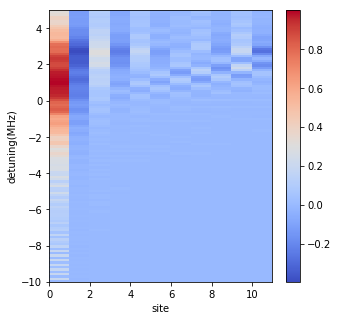

In [124]:
plt.subplots(figsize=(5,5))
plt.pcolor(np.arange(site),detuning,g,cmap='coolwarm')
plt.xlabel('site')
plt.ylabel('detuning(MHz)')
plt.colorbar()